# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [3]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [5]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [6]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [7]:
print(boston.target.shape)

(506,)


In [7]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [8]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

([<matplotlib.axis.XTick at 0x1a264a1cf8>,
 <a list of 10 Text xticklabel objects>)

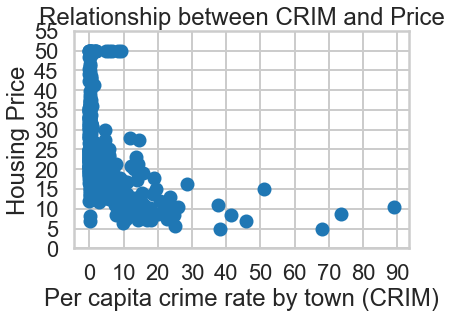

In [45]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.yticks(np.arange(0, 60, 5))
plt.xticks(np.arange(0, 100, 10))

In [ ]:
# your turn: describe relationship
The relationship between CRIM and price seems to be non-linear. 
For crime rate about 0%, the housing price varies a lot from 10k 50K. 
This means there is no linear relation between crime rate and price.
When the crime reate if above 30 percent, the house prices are less than 15K.
There is a negative relation between crime rate and price as prices are lower when the crime rate increases.

([<matplotlib.axis.YTick at 0x1a2a5ad6d8>,
 <a list of 12 Text yticklabel objects>)

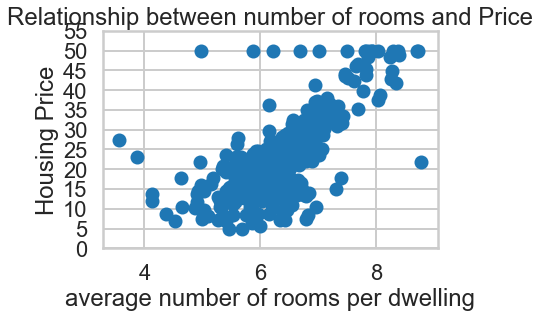

In [98]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between number of rooms and Price")
plt.yticks(np.arange(0, 60, 5))



In [ ]:

# relationship between RM and price
There is a linear relation between number of rooms and price. The price increases as the number of 
rooms increase. This is a positvie relation.
There are some outliers where the price is about 50K irrespective of the number of rooms.

([<matplotlib.axis.YTick at 0x1a2a58f898>,
 <a list of 20 Text yticklabel objects>)

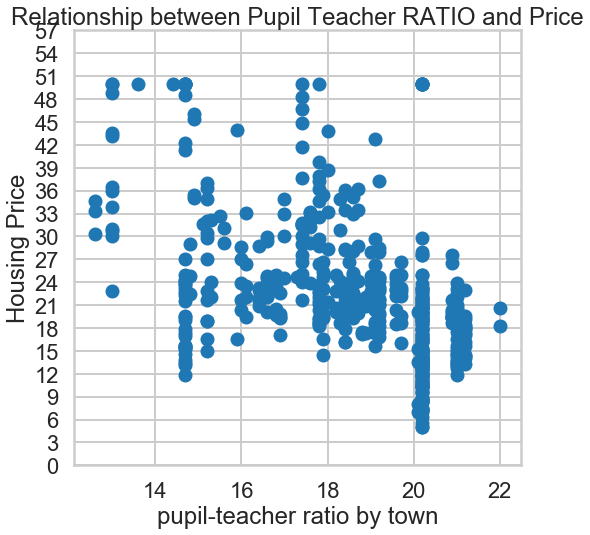

In [99]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(8, 8))
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between Pupil Teacher RATIO and Price")
y = np.random.randint(low=0, high=60, size=10)
plt.yticks(np.arange(0, max(y), 3))



In [ ]:
# relationship between PTRATIO and price
There is a very small linear relation between pupil teacher ratio and price. This relationship is more pronounced
for higher values of PTRATIO (like >=18). When the PTRATIO is more than 18, the price tends to be lower more often that not.
This is a negative relation.

([<matplotlib.axis.YTick at 0x1a2a8439e8>,
 <a list of 12 Text yticklabel objects>)

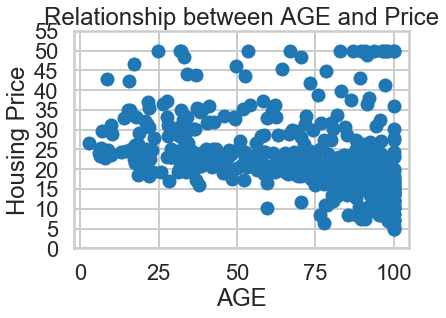

In [100]:
# your turn: create some other scatter plots
# your turn: scatter plot between *AGE* and *PRICE*
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("AGE")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")
plt.yticks(np.arange(0, 60, 5))
#plt.xticks(np.arange(0, 12,2))


In [ ]:

# relationship between AGE and price
There does not seem to be much linear relation between age and price. The price seems to vary a lot for ages
between 75 and 100. Also, there are high priced homes across all age ranges.
There is more negative relation though.
The relation does not seem clear.

Text(0.5,1,'Relationship between Distance to employment centers and Price')

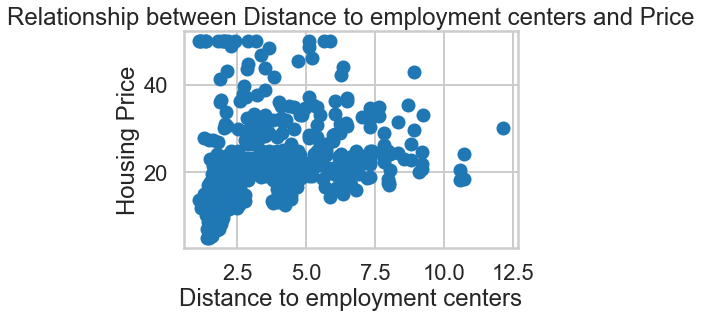

In [101]:
# your turn: create some other scatter plots
# your turn: scatter plot between *Distance* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Distance to employment centers")
plt.ylabel("Housing Price")
plt.title("Relationship between Distance to employment centers and Price")


In [ ]:
# relationship between Distance to employment centers and price
There does not seem to be linear relation between distance to employment centers and price.
Only good observation is that when distance is more than 10, prices are lower.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

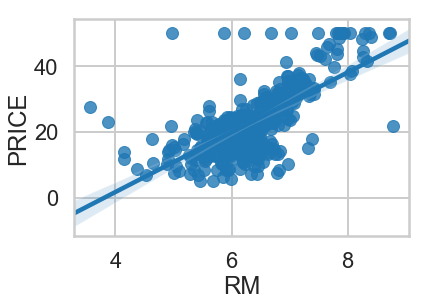

In [62]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

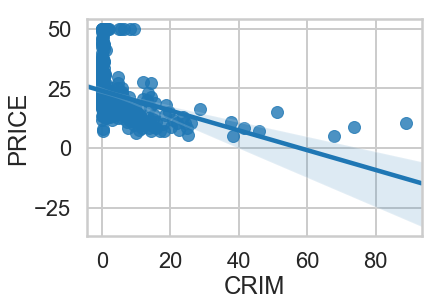

In [89]:
 sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)

### Histograms
***


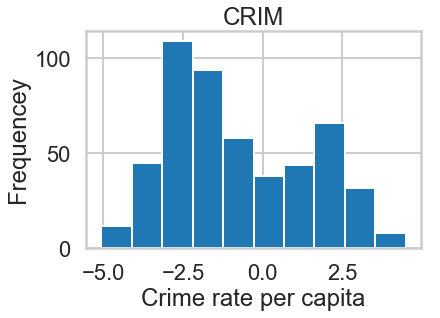

In [90]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

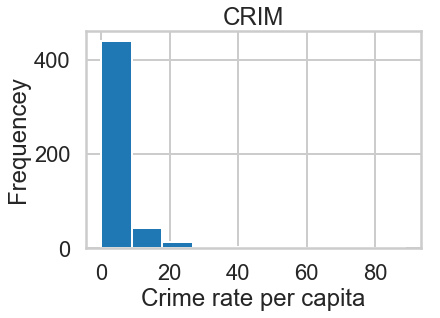

In [115]:
# Repeat this histogram without taking the log.
plt.hist((bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Text(0,0.5,'Frequency')

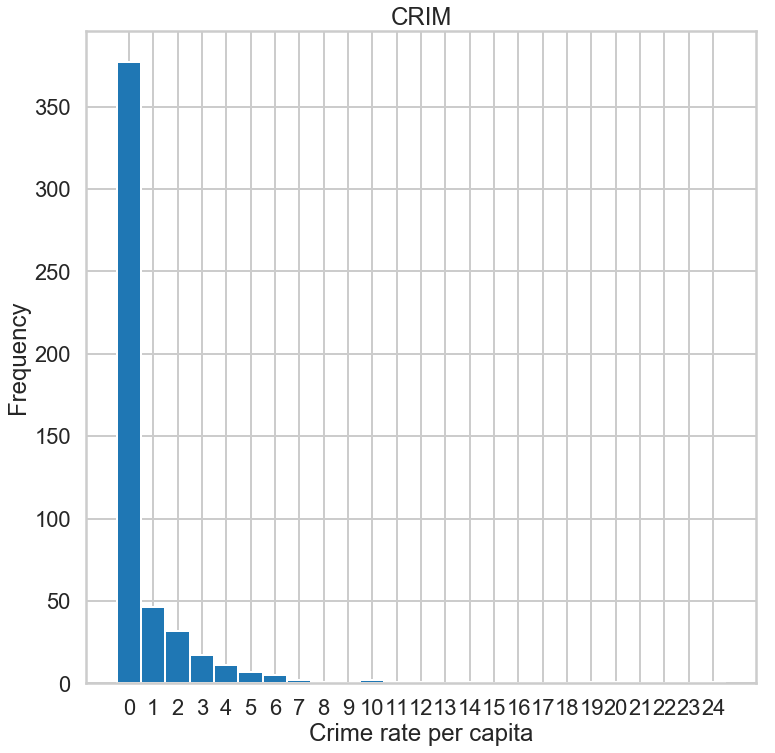

In [124]:

# Based on the above plot, we can see that most of the values are before 20. 
# We can drill down more by looking at bins
#Repeat this histogram using bins and xticks
plt.figure(figsize=(12, 12))
n, bins, patches = plt.hist(bos.CRIM, bins=25)
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = [i for i in range(25)]
plt.xticks(ticks, ticklabels)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")



In [ ]:
#What was the purpose of taking the log
based on the chart above, it shows that most of the value lie between 0 and 1.
Using log represents the distribution better


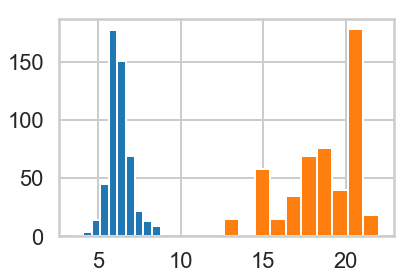

In [132]:
#Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, 
#    along with the two variables you picked in the previous section.
#    We are looking for correlations in predictors here.

plt.hist((bos.RM))
plt.hist((bos.PTRATIO))
plt.show()

# The histograms are far apart. There is no correlation here.

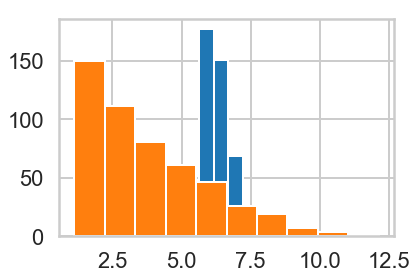

In [159]:
plt.hist((bos.RM))
plt.hist((bos.DIS))
plt.show()

#there is little correlation between room and distance.

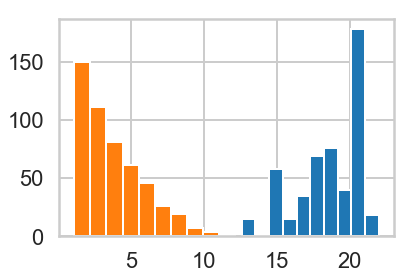

In [160]:
plt.hist((bos.PTRATIO))
plt.hist((bos.DIS))
plt.show()

#there is NO correlation between PTRATIO and distance.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [368]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.49e-74
Time:                        18:30:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5,0,'actual prices')

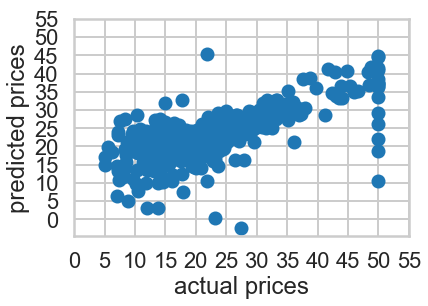

In [23]:
# your turn
plt.scatter(bos.PRICE,m.fittedvalues)
plt.yticks(np.arange(0,60,5))
plt.ylabel('predicted prices')
plt.xticks(np.arange(0,60,5))
plt.xlabel('actual prices')

Text(0.5,0,'predicted prices')

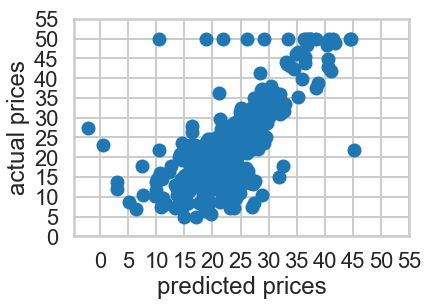

In [24]:
plt.scatter(m.fittedvalues,bos.PRICE)
plt.yticks(np.arange(0,60,5))
plt.ylabel('actual prices')
plt.xticks(np.arange(0,60,5))
plt.xlabel('predicted prices')

In [ ]:
# How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.
Based on the above 2 charts between actual prices vs predicted prices, the values are mostly very close.
Predicted prices are very close to acutal prices for most of the data points.
But there are some outliers. There are few with acutal prices between 20k to 30k but our prediction is around 1k to 5k.
Also, there are few houses with actual price of about 50K, 
but the predicted prices varies between 10K to 45K for the same.
(This seems to follow the outlier pattern for relation between room and price. 
 In the original data set, For price 50k, the room size varies between 5 to 10)

### Fitting Linear Regression using `sklearn`


In [103]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [11]:
# Look inside lm object
# lm.<tab>
lm.copy_X
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [104]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [106]:
lm.intercept_

36.45948838508978

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [13]:
# do not use from below
lm.score(X,bos.PRICE)

0.7406426641094095

In [26]:
# coefficient for RM
rm_coefficient = lm.coef_[5]

In [24]:
lm.intercept_

36.45948838508978

In [34]:
predicted_values = np.dot(X, lm.coef_) + lm.intercept_
predicted_values

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

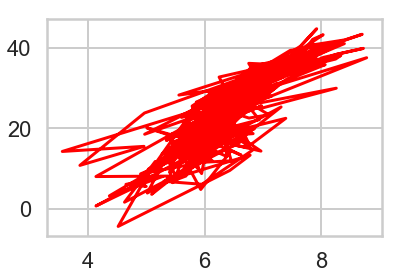

In [60]:
#plt.scatter(X.RM,bos.PRICE)
#plt.plot(X.RM, predicted_values, 'r--', label='fit_intercept=True')
#plt.scatter(X.RM, bos.PRICE)
#resh = X[5].reshape(-1,1)
X1 = X.RM.values.reshape(-1, 1)
Y1= bos.PRICE.values
Y1.shape
#X1.shape
#plt.plot(X1, bos.PRICE,color='r')
plt.plot(X1, predicted_values,color='r')
#plt.plot(X1, bos.PRICE,color='r')

In [87]:
# your turn
#How would you change the model to not fit an intercept term
#lm_new = LinearRegression(fit_intercept=False)
lm_new = LinearRegression(fit_intercept=True)
lm_new
lm_new.fit(X1,bos.PRICE)
#predicted_price=lm_new.pre
#lm_new.score(X,bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lm_new.intercept_

-34.67062077643857

In [80]:
lm_new.coef_

array([9.10210898])

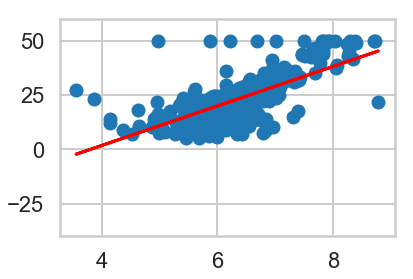

In [99]:
#new_predicted_values = np.dot(X, lm_new.coef_) + 0.0
#predicted_values
plt.scatter(X1, bos.PRICE)
#plt.xticks(np.arange(0,1,1))
plt.ylim(-40, 60)
#plt.yticks(np.arange(0, 40, 5))
plt.plot(X1, lm_new.predict(X1),color='r')

(-40, 60)

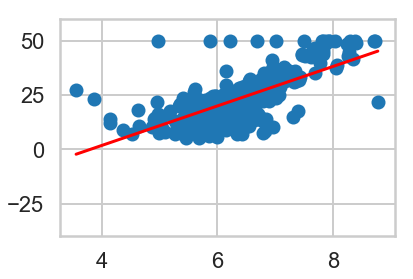

In [120]:

plt.scatter(X1, bos.PRICE)
xaxis = np.arange(X1.min(), X1.max(), 0.01)
yaxis = lm_new.predict(xaxis.reshape((len(xaxis), 1)))
plt.plot(xaxis, yaxis, color='r')
plt.ylim(-40, 60)
#pyplot.title(type(model).__name__)

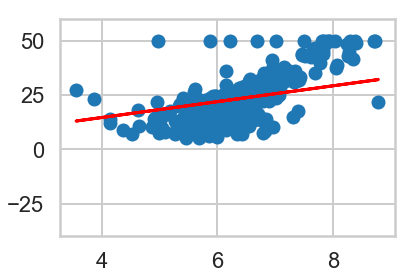

In [102]:
lm_new_false = LinearRegression(fit_intercept=False)
#lm_new = LinearRegression(fit_intercept=True)
lm_new_false
lm_new_false.fit(X1,bos.PRICE)
#predicted_price=lm_new.pre
#lm_new.score(X,bos.PRICE)
#plt.yticks(np.arange(0, 40, 5))
plt.ylim(-40, 60)
plt.scatter(X1, bos.PRICE)
plt.plot(X1, lm_new_false.predict(X1),color='r')

In [ ]:
#Would you recommend not having an intercept? Why or why not?
Intercept is the mean of the response when all features are zero. When we have features like room, age,ptratio 
as zero, it would make sense to have the the predicted price to also be zero.
Not having a intercept will make the line pass through origin and would make predicted price to be zero.
I would recommend not having an intercept.

In [ ]:
#Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. 
#(independently and identically distributed).
#To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.
No, it is not enough.
If residuals are normally distributed, it usually means the mean is zero and standard deviation is 1.
This in turn means that residuals are identically distributed. so with respect to "i.d" we are ok
But this does not mean they are independent.so with respect to "i." we are not ok


In [ ]:
#Exercise: True or false. To use linear regression,  Y  must be normally distributed. Explain your answer.
No. Linear regression works best when the independent variables X are normally distributed.
But the target variable Y does not need to be normally distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [107]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [108]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [109]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [110]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

(array([  1.,   6.,  21.,  56., 116., 136.,  76.,  58.,  25.,  11.]),
 array([-4.28131071,  0.6141287 ,  5.50956811, 10.40500752, 15.30044693,
        20.19588634, 25.09132575, 29.98676516, 34.88220457, 39.77764398,
        44.67308339]),
 <a list of 10 Patch objects>)

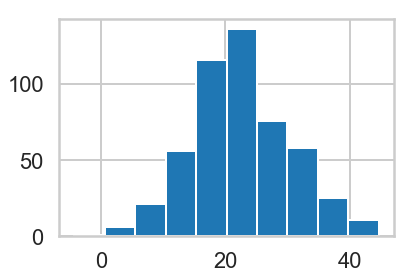

In [111]:
# your turn
#Plot a histogram of all the predicted prices
plt.hist(lm.predict(X))

([<matplotlib.axis.XTick at 0x12cac8a20>,
 <a list of 10 Text xticklabel objects>)

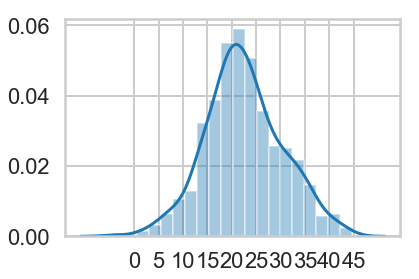

In [116]:
#plt.hist(lm.predict(X))
sns.distplot(lm.predict(X))
plt.xticks(np.arange(0,50,5))

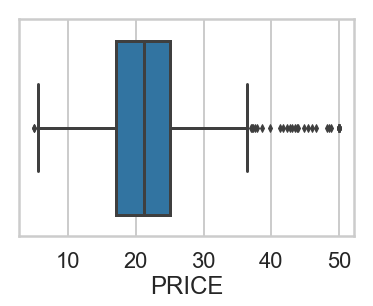

In [126]:
#pre =lm.predict(X)
#sns.boxplot(pre, bos.PRICE)
sns.boxplot(bos.PRICE)

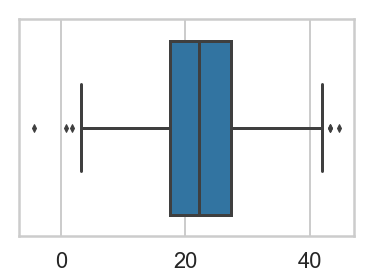

In [127]:
sns.boxplot(lm.predict(X))

In [521]:
error_df = pd.DataFrame()
error_df['actual'] = bos.PRICE
error_df['predicted'] = lm.predict(X)
error_df['error'] = error_df['actual'] - error_df['predicted']
#error_df['error_squared'] = pow(error_df['actual'] - error_df['predicted'],2 )
#error_df.error_squared.mean()
mean_error = error_df.error.mean()
standard_dev = error_df.error.std()
print ('mean_error',mean_error)
print ('mean_standard_dev',mean_standard_dev)

error_df[(np.abs(error_df.error-mean_error)>(2*standard_dev))]


mean_error -7.70573767289239e-15
mean_standard_dev 4.683821867137901


,actual,predicted,error
64,33.0,23.373086,9.626914
141,14.4,3.988855,10.411145
161,50.0,36.774670,13.225330
162,50.0,40.557658,9.442342
166,50.0,37.203475,12.796525
186,50.0,35.884972,14.115028
214,23.7,11.119167,12.580833
225,50.0,39.814619,10.185381
228,46.7,35.456652,11.243348
233,48.3,37.163286,11.136714


In [ ]:
#Write a story about what you see. Describe the shape, center and spread of the distribution.
#Are there any outliers? 
#What might be the reason for them? Should we do anything special with them?

Text(0.5,0,'actual prices')

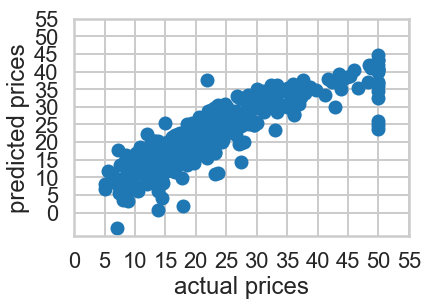

In [519]:
# Scatterplot: Let's plot the true prices compared to the predicted 
#prices to see they disagree (we did this with `statsmodels` before).

plt.scatter(bos.PRICE,lm.predict(X))
plt.yticks(np.arange(0,60,5))
plt.ylabel('predicted prices')
plt.xticks(np.arange(0,60,5))
plt.xlabel('actual prices')

In [ ]:
#We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. 
#What are the advantages and disadvantages of each based on your exploration? 
#Based on the information provided by 
#both packages, what advantage does `statsmodels` provide?

statsmodel provides a easy method to look at summary statistics like f-statistics, r-squared.
Also easier to look at coefficients, p-value etc.
sklearn is good for advanced regression.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [152]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [154]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837064256


In [255]:
TSS = np.sum((lm.predict(X) - np.mean(bos.PRICE))**2) + np.sum((bos.PRICE - lm.predict(X)) ** 2)
R_SQUARED = np.sum((lm.predict(X) - np.mean(bos.PRICE))**2)/ TSS
R_SQUARED

0.7406426641094062

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

In [175]:
K = X.shape[1]
N = X.shape[0]

MSR= np.sum((bos.PRICE - lm.predict(X)) ** 2)/ K # ESS/ K
MSE = np.sum((bos.PRICE - lm.predict(X)) ** 2) / (N-K-1) # RSS/N-K-1
F = MSR/ MSE
F

37.84615384615385

In [273]:
from sklearn.feature_selection import f_regression
freg1=f_regression(X,y)

p1=freg[1]

print(p1)

[0.0000000000000000000000000000000001609509]


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [163]:
# your turn

lm_ptratio = LinearRegression()
X_PTRATIO = bos.PTRATIO.values.reshape(-1,1)
y_price = bos.PRICE
lm_ptratio.fit(X_PTRATIO,y_price)
print ('coefficients',lm_ptratio.coef_)
print ('intercept',lm_ptratio.intercept_)


coefficients [-2.1571753]
intercept 62.34462747483265


#interpret the intercept and the coefficients
The cofficient for PTRATIO is -2.15. This implies a negative relation to price 
(If PTRATIO is high, price will decrease)

In [256]:
#Calculate (or extract) the  R2  value
RESIDUAL_SS = np.sum((bos.PRICE - lm_ptratio.predict(X_PTRATIO)) ** 2)
EXPLAINED_SS = np.sum((lm_ptratio.predict(X_PTRATIO) - np.mean(bos.PRICE))**2)
TSS_PTRATIO = EXPLAINED_SS + RESIDUAL_SS
R_SQUARED_PTRATIO = EXPLAINED_SS/ TSS_PTRATIO
R_SQUARED_PTRATIO

0.25784731800922267

In [ ]:
#What does it tell you?
R2 value is pretty low at 0.25 (25%) . This implies percentage of variance in dependent variable (price) that can be 
explained by independent variable(ptratio) is very less. 
This is a weak relation

In [179]:
#Compute the  F -statistic.
K = X_PTRATIO.shape[1]
N = X_PTRATIO.shape[0]

MSR= EXPLAINED_SS/ K # ESS/ K
MSE = RESIDUAL_SS/ (N-K-1) # RSS/N-K-1
F = MSR/ MSE
F

175.10554287569514

In [ ]:
#What does it tell you?
The F -statistic value is high. It means the model is statistifcially significant because of ptratio.
If we do not have ptratio(the only independent variable here), the prediction is more worse

In [270]:
#p-value
from sklearn.feature_selection import f_regression
freg=f_regression(X_PTRATIO,y_price)

p=freg[1]

print('pvalue',p)


pvalue [0.0000000000000000000000000000000001609509]


In [271]:
# t-statistic

t1 = stats.t.ppf(pval, 506)
print ('t-statistic',t1)


t-statistic [-13.158411976187285]


In [272]:
#  F -statistic and the  t -statistic
#What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.
print ('squred t1',t1**2)
print ('F',F)

For this model,  t -statistic = square root of F -statistic

squred t1 [173.14380573506898]
F 175.10554287569514


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [410]:
# your turn
#Fit a linear regression model using three independent variables
df_3 = pd.DataFrame()
df_3['CRIM'] =bos.CRIM
df_3['RM'] =bos.RM
df_3['PTRATIO'] =bos.PTRATIO
y_3 = bos.PRICE
lm_3 = LinearRegression()
lm_3.fit(df_3,y_3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [397]:
lm_3.coef_

array([-0.20496083329583506,  7.380411104480519  , -1.069546098883178  ])

In [398]:
lm_3.intercept_

-3.3707043351542083

In [265]:
#Compute or extract the  R2  statistic.
RESIDUAL_SS_3 = np.sum((y_3 - lm_3.predict(df_3)) ** 2)
EXPLAINED_SS_3 = np.sum((lm_3.predict(df_3) - np.mean(y_3))**2)
TSS_3 = EXPLAINED_SS_3 + RESIDUAL_SS_3
R_SQUARED_3 = EXPLAINED_SS_3/ TSS_3
R_SQUARED_3

0.5943412940723471

In [ ]:
#What does it tell you about the model?

In [ ]:
R2 value is pretty decent at 0.59 (60%) This implies percentage of variance in dependent variable (price) that can be 
explained by independent variable(ptratio) is pretty good. 
This is a decent relation which is neither week nor strong.
It needs more independent variables to make it a strong relation.

In [526]:
#Compute or extract the  F -statistic. 
K_3 = df_3.shape[1]
N_3 = df_3.shape[0]
K_3
N_3
MSR_3= EXPLAINED_SS_3/ K_3 # ESS/ K
MSE_3 = RESIDUAL_SS_3/ (N_3-K_3-1) # RSS/N-K-1
F_3 = MSR_3/ MSE_3
print ('MSR',MSR_3)
print ('MSE',MSE_3)
print ('F-statistic',F_3)


MSR 8462.686098313172
MSE 34.51840063761006
F-statistic 245.16449030064624


In [ ]:
#What does it tell you about the model?
#What does it tell you?
The F -statistic value is high. It means the model is statistifcially significant because of the 3 variables used.
If we do not have the 3 independent variable here, the prediction is more worse

In [275]:
lm_3.coef_

array([-0.20496083329583506,  7.380411104480519  , -1.069546098883178  ])

In [ ]:
#Which variables in the model are significant in predicting house price? 
#Write a story that interprets the coefficients.
The coefficient for CRIM /Crime rate is -0.2049
The coefficient for RM /number of rooms is 7.3804
The coefficient for PTRATIO/pupil teacher ratio is -1.0695

The dependent variable(price) is influenced more by the number of rooms. 
on Average each additional room increase will increase the price by $7380.
This is a strong positive relation.

The crime rate is a negative relation and increase in crime rate would decrease price by at $204.
The PTRATIO is a negative relation and increase in PTRATIO would decrease price by $1069

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [307]:
#Find another variable (or two) to add to the model we built in Part 3.
# will add charles river and nitrous oxide
df_5 = pd.DataFrame()
df_5['CRIM'] =bos.CRIM
df_5['RM'] =bos.RM
df_5['PTRATIO'] =bos.PTRATIO
df_5['CHAS'] =bos.CHAS
df_5['NOX'] =bos.NOX
y_5 = bos.PRICE
lm_5 = LinearRegression()
lm_5.fit(df_5,y_5)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [308]:
lm_5.coef_

array([ -0.1298324472498455,   6.775480497625336 ,  -1.0218156148603779,
         3.9402966050437156, -14.625133144630059 ])

In [309]:
#Compute or extract the  R2  statistic.
RESIDUAL_SS_5 = np.sum((y_5 - lm_5.predict(df_5)) ** 2)
EXPLAINED_SS_5 = np.sum((lm_5.predict(df_5) - np.mean(y_5))**2)
TSS_5 = EXPLAINED_SS_5 + RESIDUAL_SS_5
R_SQUARED_5 = EXPLAINED_SS_5/ TSS_5
R_SQUARED_5

0.6270298841946421

In [310]:
#Compute or extract the  F -statistic. 
K_5 = df_5.shape[1]
N_5 = df_5.shape[0]
K_5
N_5
MSR_5= EXPLAINED_SS_5/ K_5 # ESS/ K
MSE_5 = RESIDUAL_SS_5/ (N_5-K_5-1) # RSS/N-K-1
F_5 = MSR_5/ MSE_5
F_5

168.1179959527563

In [317]:
#from statsmodels import ols
from statsmodels.formula.api import ols
stats_df_3 = ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()
stats_df_3.aic

3231.9451235449956

In [318]:
from statsmodels.formula.api import ols
stats_df_5 = ols('PRICE ~ CRIM+RM+PTRATIO+CHAS+NOX',bos).fit()
stats_df_5.aic

3193.4340990840356

In [ ]:
# Which model is better?
old model has features CRIM+RM+PTRATIO
new model  has features CRIM+RM+PTRATIO+CHAS+NOX
The R2 value is more for the new model with 2 more features.
The f-statistic is little less for the new model. 
The aic value is little less for the new model.
so, new model is little better than the old model.



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [319]:
# Your turn.
lm_3.coef_


array([-0.20496083329583506,  7.380411104480519  , -1.069546098883178  ])

In [320]:
lm_3.intercept_

-3.3707043351542083

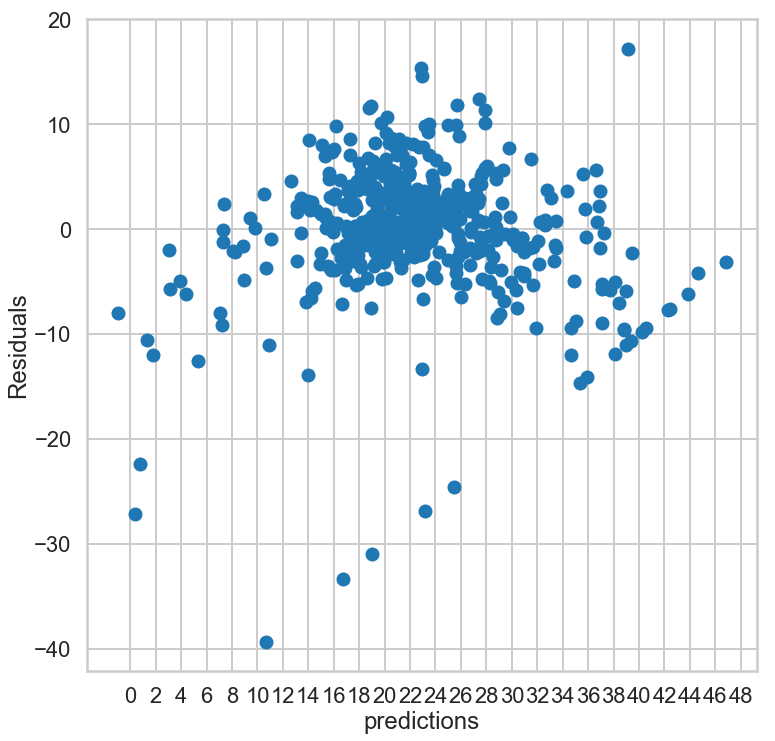

In [357]:
#Construct a fitted values versus residuals plot.
residuals = lm_3.predict(df_3) - y_3
predictions = lm_3.predict(df_3)
plt.figure(figsize=(12, 12))
plt.scatter(predictions,residuals)
plt.xticks(np.arange(0,50,2))
plt.xlabel("predictions")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#What does the plot tell you? 
For predicted values between 0 and 2 residuals have a lot of variance. Most of it are below zero. 
(model is predicting less price)

For predicted values between 1 and 10 residuals have very less variance. seems good.

For predicted values between 10 and 12 residualsis the most and its negative.

For predicted values between 16 and 26 residuals have a little bit of variance and most of it is negative.

For predicted values between 26 and 40 residuals have very less variance. seems good.


Text(0,0.5,'Residuals')

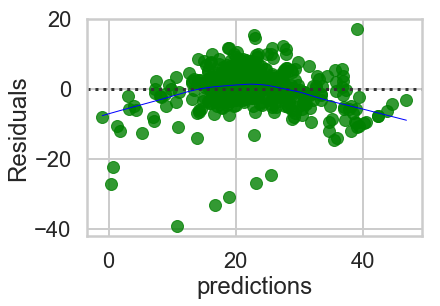

In [351]:
#Construct a fitted values versus residuals plot.
sns.residplot(predictions.reshape(-1),residuals, data=None,lowess=True,color='green',
                                  line_kws={'color': 'blue', 'lw': 1, 'alpha': 1})
plt.xlabel("predictions")
plt.ylabel("Residuals")




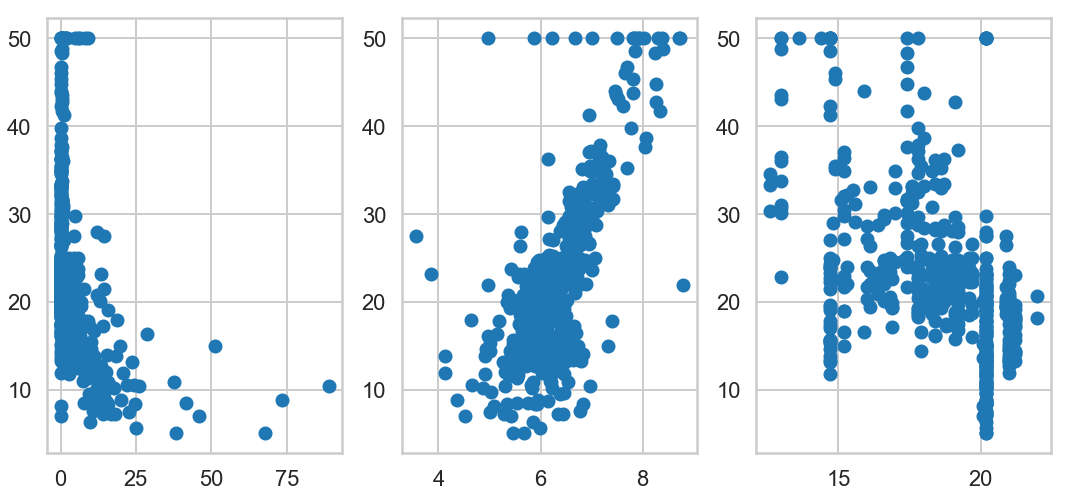

In [381]:
#Are there any violations of the model assumptions?
#plot each feature against Y
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.scatter(df_3.CRIM,y_3)
plt.subplot(1, 3, 2)
plt.scatter(df_3.RM,y_3)
plt.subplot(1, 3, 3)
plt.scatter(df_3.PTRATIO,y_3)
plt.show()

In [ ]:
#Are there any violations of the model assumptions?
some non linearity of the data exists. CRIM is not linear by itself, may be there is correlation
with some other feature. RM is linear. PTRATIO is little linear.
There are some outliers as well

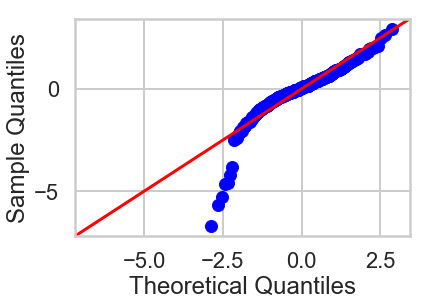

In [387]:
#Construct a quantile plot of the residuals.
import statsmodels.api as sm
sm.qqplot(residuals, line='45', fit=True, dist='norm')
plt.show()

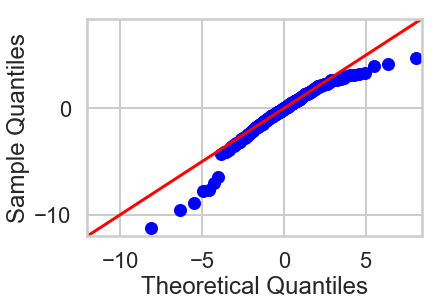

In [391]:
sm.qqplot(residuals, line='45', fit=True,dist='t')
plt.show()

In [ ]:
#What does the plot tell you?
The residuals in general follow normal distribution. 
But there are many outliers which do not follow the same distribution

In [424]:
#Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
#error_df_3.drop()
error_df_3 = pd.DataFrame()
error_df_3['CRIM']=df_3.CRIM
error_df_3['RM']=df_3.RM
error_df_3['PTRATIO']=df_3.PTRATIO
df_3
error_df_3['predicted'] = lm_3.predict(error_df_3)
df_3
error_df_3['actual'] = bos.PRICE
error_df_3
df_3
#error_df_3
error_df_3['error'] = error_df_3['actual'] - error_df_3['predicted']
error_df_3
mean_error_3 = error_df_3.error.mean()
standard_dev_3 = error_df_3.error.std()
print ('mean_error',mean_error_3)
print ('mean_standard_dev',standard_dev_3)

outliers = error_df_3[(np.abs(error_df_3.error-mean_error_3)>(2*standard_dev_3))]
outliers

mean_error -1.0637077516566717e-14
mean_standard_dev 5.857759028147374


,CRIM,RM,PTRATIO,predicted,actual,error
10,0.22489,6.377,15.2,27.390983,15.0,-12.390983
145,2.37934,6.130,14.7,25.661217,13.8,-11.861217
161,1.46336,7.489,14.7,35.878935,50.0,14.121065
162,1.83377,7.802,14.7,38.113084,50.0,11.886916
181,0.06888,6.144,17.8,22.922503,36.2,13.277497
186,0.05602,7.831,17.8,35.375893,50.0,14.624107
228,0.29819,7.686,17.4,34.683916,46.7,12.016084
364,3.47428,8.780,20.2,39.112383,21.9,-17.212383
365,4.55587,3.561,20.2,0.372333,27.5,27.127667
367,13.52220,3.863,20.2,0.763471,23.1,22.336529


In [504]:
crim_df_3 = pd.DataFrame()
crim_df_3['CRIM']=df_3.CRIM
mean_crim_3 = crim_df_3.CRIM.mean()
standard_dev_crim_3 = crim_df_3.CRIM.std()
crim_df_3[(np.abs(crim_df_3.CRIM-mean_crim_3)>(3*standard_dev_crim_3))]


,CRIM
380,88.9762
398,38.3518
404,41.5292
405,67.9208
410,51.1358
414,45.7461
418,73.5341
427,37.6619


In [518]:
rm_df_3 = pd.DataFrame()
rm_df_3['RM']=df_3.RM
mean_rm_3 = rm_df_3.RM.mean()
standard_dev_rm_3 = rm_df_3.RM.std()
rm_df_3[(np.abs(rm_df_3.RM-mean_rm_3)>(3*standard_dev_rm_3))]

,RM
225,8.725
257,8.704
262,8.398
364,8.780
365,3.561
367,3.863
374,4.138
406,4.138


In [503]:
pt_df_3 = pd.DataFrame()
pt_df_3['PTRATIO']=df_3.PTRATIO
mean_pt_3 = pt_df_3.PTRATIO.mean()
standard_dev_pt_3 = pt_df_3.PTRATIO.std()
pt_df_3[(np.abs(pt_df_3.PTRATIO-mean_pt_3)>(3*standard_dev_pt_3))]

,PTRATIO


In [ ]:
#write a story describing what these outliers might represent.

<Figure size 576x576 with 0 Axes>

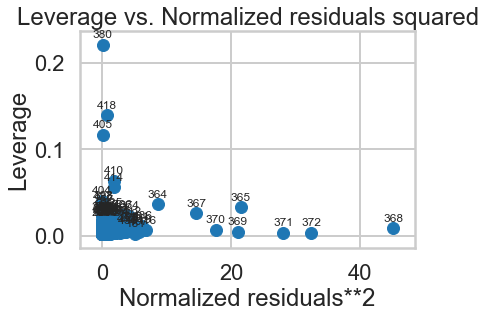

In [499]:
#Construct a leverage plot and identify high leverage points in the model. 
#Write a story explaining possible reasons for the high leverage points.
from statsmodels.formula.api import ols
stats_df_5 = ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()

plt.figure(figsize=(8, 8))

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(stats_df_5)
plt.show()


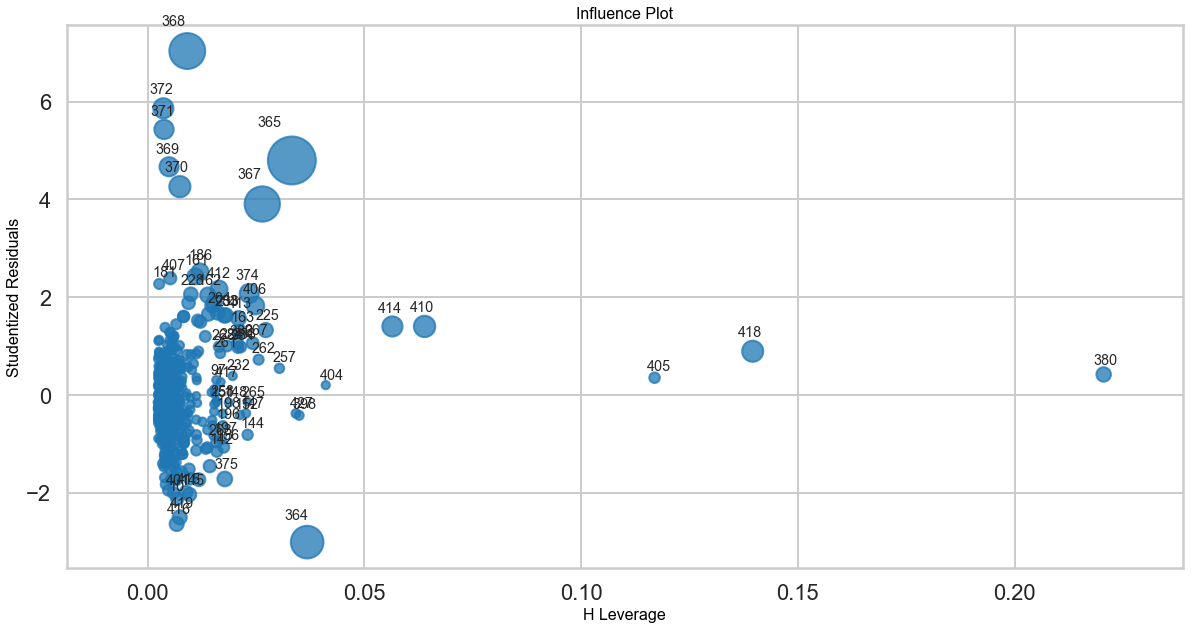

In [517]:
#axis= plt.figure(figsize=(20, 8))
fig, axis = plt.subplots(figsize=(20,10))
influence_plot( stats_df_5, ax=axis)
plt.show()

In [ ]:
#Construct a leverage plot and identify high leverage points in the model. 
#Write a story explaining possible reasons for the high leverage points.

In [486]:
#Remove the outliers and high leverage points from your model
#and run the regression again. How do the results change?
outliers.index
outliers_removed_df=pd.DataFrame(columns=['CRIM', 'RM', 'PTRATIO'])
outliers_removed_target_df=pd.DataFrame()
for index, row in df_3.iterrows():
    #print (type(row))
    #print ('row',row)
    if index not in outliers.index:
        outliers_removed_df = outliers_removed_df.append(row)
        #print ('outliers_removed_df',outliers_removed_df)
     
#outliers_removed_df
outliers_removed_df.shape
        

(485, 3)

In [464]:
outliers_removed_df

,CRIM,RM,PTRATIO
0,0.00632,6.575,15.3
1,0.02731,6.421,17.8
2,0.02729,7.185,17.8
3,0.03237,6.998,18.7
4,0.06905,7.147,18.7
5,0.02985,6.430,18.7
6,0.08829,6.012,15.2
7,0.14455,6.172,15.2
8,0.21124,5.631,15.2
9,0.17004,6.004,15.2


In [454]:
y_3
print (type(y_3))
outliers_removed_target=pd.Series()
outliers_removed_target
print (type(outliers_removed_target))
for index, row in y_3.iteritems():
    #print (type(row))
    if index not in outliers.index:
        outliers_removed_target.at[index] = row
     
outliers_removed_target.shape

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


(485,)

(485,)

In [453]:
y_3.shape

(506,)

In [437]:
outliers.index
outliers.shape

(21, 6)

In [465]:
outlier_removed_lm=LinearRegression()
outlier_removed_lm.fit(outliers_removed_df,outliers_removed_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [466]:
outlier_removed_lm.coef_

array([-0.21064210742144818,  8.344395181321726  , -1.0812058747801352 ])

In [467]:
RESIDUAL_SS_outlier_removed = np.sum((outliers_removed_target - outlier_removed_lm.predict(outliers_removed_df)) ** 2)
EXPLAINED_SS_outlier_removed = np.sum((outlier_removed_lm.predict(outliers_removed_df) - np.mean(outliers_removed_target))**2)
TSS_outlier_removed = EXPLAINED_SS_outlier_removed + RESIDUAL_SS_outlier_removed
R_SQUARED_outlier_removed = EXPLAINED_SS_outlier_removed/ TSS_outlier_removed
R_SQUARED_outlier_removed

0.7622212267871633

In [522]:
#another way to calulcate metrics
from sklearn import metrics
sklearn.metrics.r2_score(outliers_removed_target, outlier_removed_lm.predict(outliers_removed_df))

0.7622212267871633

In [523]:
sklearn.metrics.mean_absolute_error(outliers_removed_target, outlier_removed_lm.predict(outliers_removed_df))

3.2117313933377587

In [524]:
sklearn.metrics.mean_squared_error(outliers_removed_target, outlier_removed_lm.predict(outliers_removed_df))

17.103774699850074

In [525]:
#rmse
sklearn.metrics.mean_squared_error(outliers_removed_target, outlier_removed_lm.predict(outliers_removed_df), squared=False)

4.135671009624686

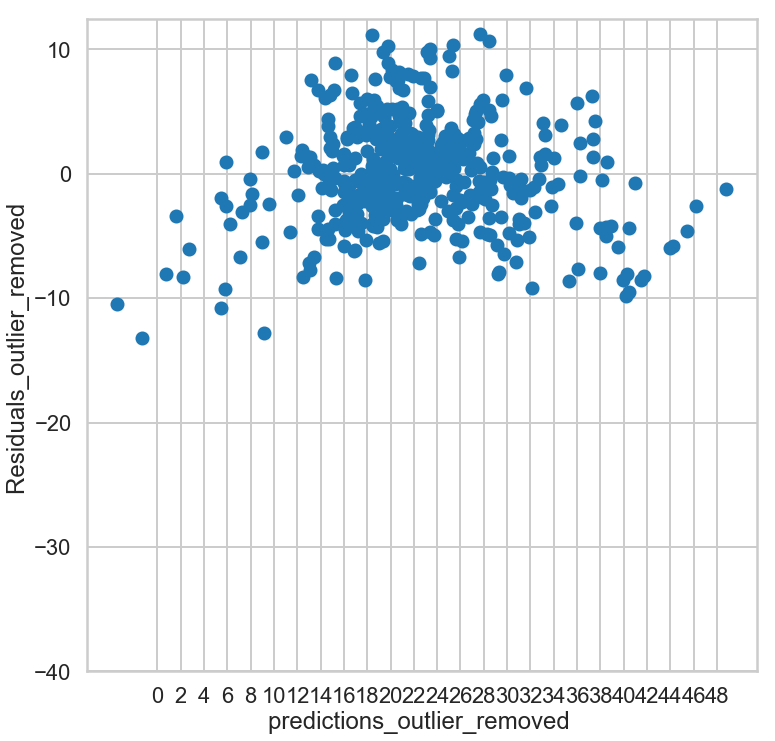

In [471]:
#Construct a fitted values versus residuals plot.
residuals_outlier_removed  = outlier_removed_lm.predict(outliers_removed_df) - outliers_removed_target
predictions_outlier_removed  = outlier_removed_lm.predict(outliers_removed_df)
plt.figure(figsize=(12, 12))
plt.scatter(predictions_outlier_removed ,residuals_outlier_removed )
plt.xticks(np.arange(0,50,2))
plt.yticks(np.arange(-40,20,10))
plt.xlabel("predictions_outlier_removed ")
plt.ylabel("Residuals_outlier_removed ")
plt.show()

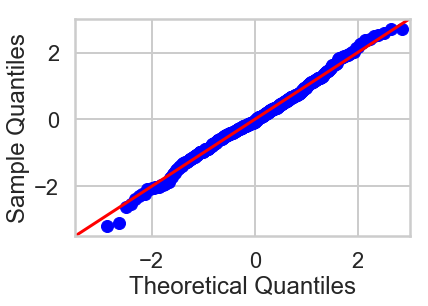

In [472]:
sm.qqplot(residuals_outlier_removed, line='45', fit=True, dist='norm')
plt.show()